<a href="https://colab.research.google.com/github/anshuwarrior27/projects_analytics/blob/main/walmartsalesanalysisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [23]:
df = pd.read_csv("/content/Walmart_Sales.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [24]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [26]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [27]:
df['Month'] = df['Date'].dt.to_period('M')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Month         6435 non-null   period[M]     
dtypes: datetime64[ns](1), float64(5), int64(2), period[M](1)
memory usage: 452.6 KB


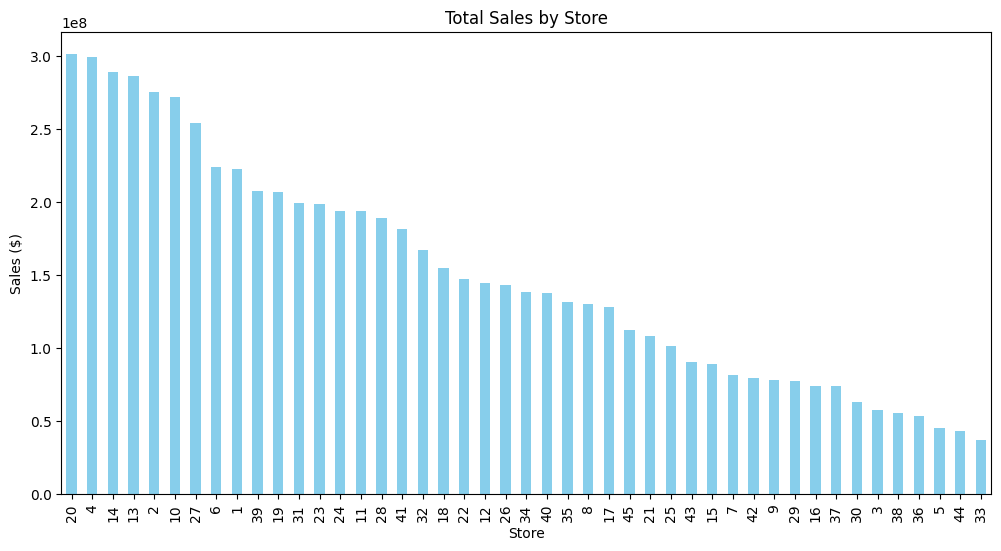

In [30]:
#TOTAL SALES TRENDS
import matplotlib.pyplot as plt
import seaborn as sns


store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

store_sales.plot(
    kind='bar',
    figsize=(12, 6),
    title='Total Sales by Store',
    xlabel='Store',
    ylabel='Sales ($)',
    color='skyblue'
)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

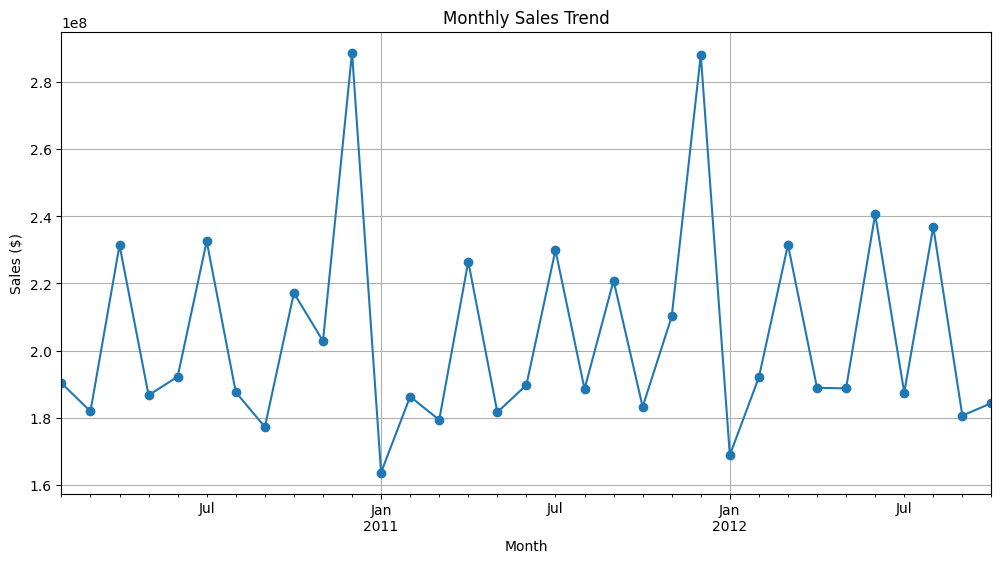

In [31]:
#MONTHLY SALES TRENDS
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()

monthly_sales.plot(
    kind='line',
    figsize=(12, 6),
    marker='o',
    title='Monthly Sales Trend'
)
plt.ylabel('Sales ($)')
plt.grid(True)
plt.show

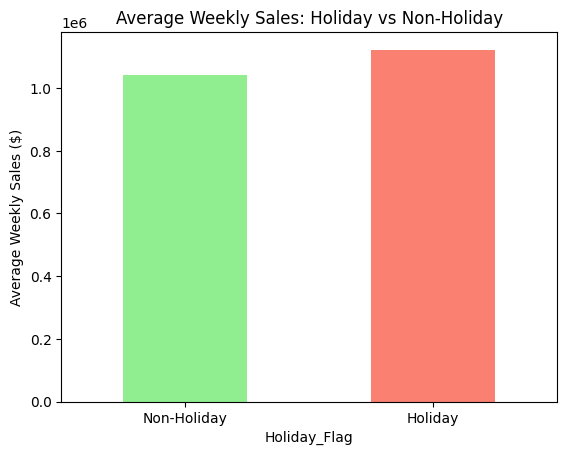

In [32]:
#NON-HOLIDAY V/S HOLIDAY SALES
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

holiday_sales.plot(
    kind='bar',
    title='Average Weekly Sales: Holiday vs Non-Holiday',
    color=['lightgreen', 'salmon']
)
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.ylabel('Average Weekly Sales ($)')
plt.show()





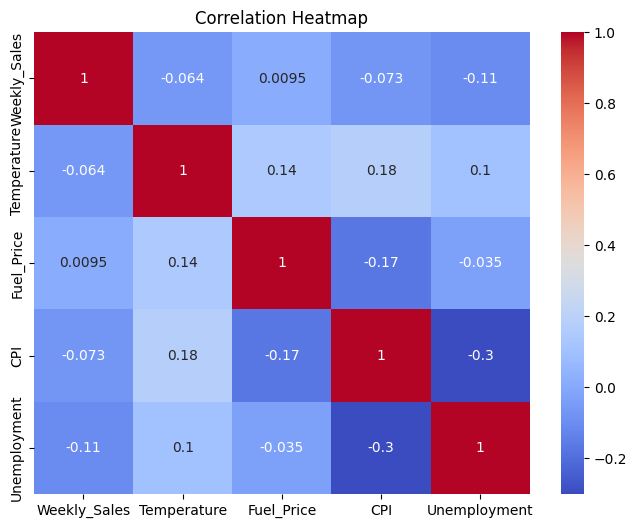

In [34]:
#CORRELATION HEATMAP
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(
    df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.show()